# IA369Z - Reprodutibilidade em Pesquisa Computacional.



## Leitura de informações do arquivo CSV


O Arquivo é exportado pela plataforma thingspeak por um canal aberto e público para visualização.
Gerando o arquivo conseguimos estudar melhor e também pode ser usado para gerar novos históricos de outras arquiteturas para comparações.

Resultados gerados de um módulo ESP8266 versão 1, programado na linguagem LUA.


## Importação do contéudo no notebook
São informado 3 tipos colunas de informações
* Data e Hora de ativação
* Registro de entrada
* Voltagem

## Arquivos na pasta data

* database.csv
    Editei base para informações gerada em 2017

* databaseoriginal.csv
    Arquivo orginal com informações desde de 2015.
 

In [1]:
import numpy as np

In [2]:
import csv

In [35]:
with open('../data/database.csv', 'rb') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    for row in spamreader:
        print ', '.join(row)

created_at,entry_id,field1
2017-01-06, 22:49:19, UTC,380,3238
2017-01-07, 14:31:19, UTC,381,3238
2017-01-07, 15:32:59, UTC,382,3234
2017-01-07, 17:33:27, UTC,383,3238
2017-01-07, 20:02:41, UTC,384,3230
2017-01-08, 16:04:56, UTC,385,3222
2017-01-08, 20:07:52, UTC,386,3211
2017-01-08, 21:49:05, UTC,387,3237
2017-01-08, 22:49:15, UTC,388,3238
2017-01-10, 20:37:57, UTC,389,3238
2017-01-10, 21:02:21, UTC,390,3238
2017-01-10, 21:08:35, UTC,391,3238
2017-01-10, 21:27:09, UTC,392,3237
2017-01-10, 21:30:44, UTC,393,3238
2017-01-10, 21:35:02, UTC,394,3236
2017-01-10, 21:51:12, UTC,395,3235
2017-01-11, 21:06:39, UTC,396,3236
2017-01-11, 21:25:03, UTC,397,3235
2017-01-12, 13:07:17, UTC,398,3231
2017-01-12, 13:07:51, UTC,399,3230
2017-01-12, 18:47:26, UTC,400,3230
2017-01-12, 18:48:13, UTC,401,3230
2017-01-12, 18:49:18, UTC,402,3230
2017-01-12, 20:56:32, UTC,403,3230
2017-01-14, 11:15:14, UTC,404,3226
2017-01-14, 11:15:42, UTC,405,3226
2017-01-22, 22:19:29, UTC,406,3206
2017-01-23, 21:13:22, UTC,40

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.__version__

u'0.19.2'

In [37]:
consumo = pd.read_csv('../data/databaseoriginal.csv')

In [38]:
pandas.read_csv('file.csv', sep=';', skipinitialspace=True)


NameError: name 'pandas' is not defined

In [39]:
%matplotlib inline


In [40]:
consumo.head()

,created_at,entry_id,field1
0,2015-10-04 22:37:34 UTC,1,3255
1,2015-10-04 22:38:09 UTC,2,3254
2,2015-10-04 22:38:56 UTC,3,3252
3,2015-10-04 22:39:25 UTC,4,3252
4,2015-10-04 22:39:48 UTC,5,3252


In [41]:
consumo.describe()

,entry_id,field1
count,425.000000,425.000000
mean,213.000000,3261.689412
std,122.831185,1510.666165
min,1.000000,2507.000000
25%,107.000000,3142.000000
50%,213.000000,3252.000000
75%,319.000000,3299.000000
max,425.000000,33333.000000


In [42]:
import pandas as pd
from altair import Chart, X, Y, Axis, SortField

budget = pd.read_csv("https://raw.githubusercontent.com/EstevesDouglas/UNICAMP-FEEC-IA369Z/master/data/databaseoriginal.csv")
budget.head()

,created_at,entry_id,field1
0,2015-10-04 22:37:34 UTC,1,3255
1,2015-10-04 22:38:09 UTC,2,3254
2,2015-10-04 22:38:56 UTC,3,3252
3,2015-10-04 22:39:25 UTC,4,3252
4,2015-10-04 22:39:48 UTC,5,3252


In [43]:
budget_top_10 = budget.sort_values(by='created_at',ascending=False)[:10]


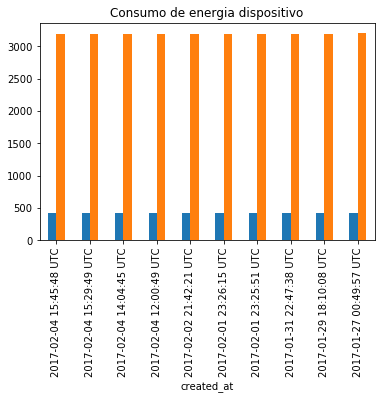

In [44]:
budget_top_10.plot(kind="bar", x=budget_top_10["created_at"],
                   title="Consumo de energia dispositivo",
                   legend=False)

In [45]:
budget_top_10 = budget.sort_values(by='created_at',ascending=True)[:10]


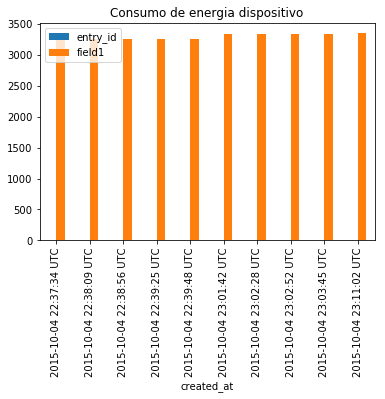

In [46]:
budget_top_10.plot(kind="bar", x=budget_top_10["created_at"],
                   title="Consumo de energia dispositivo",
                   legend=True)

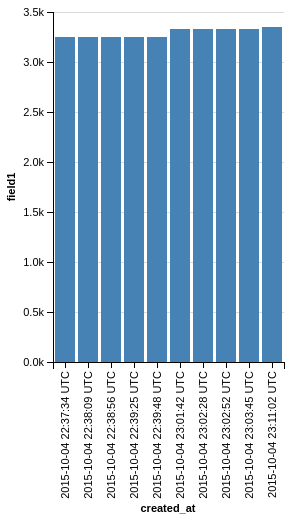

In [47]:
Chart(budget_top_10).mark_bar().encode(x='created_at', y='field1')


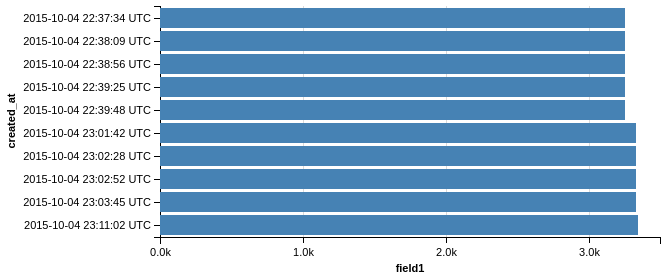

In [48]:
Chart(budget_top_10).mark_bar().encode(y='created_at', x='field1')


Mais opções


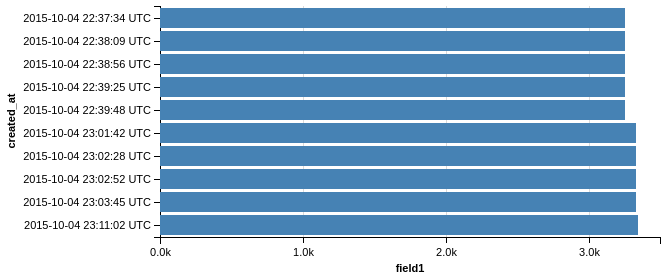

In [49]:
Chart(budget_top_10).mark_bar().encode(x=X('field1'), y=Y('created_at'))

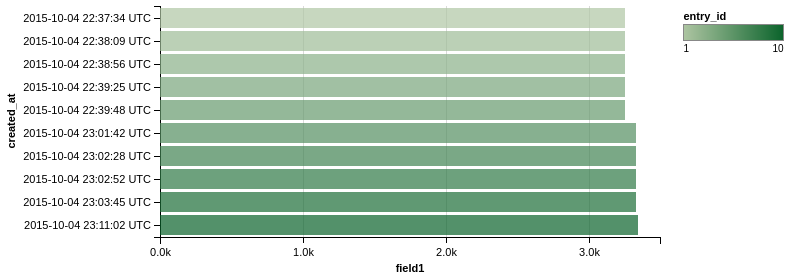

In [50]:
Chart(budget_top_10).mark_bar().encode(
    x=X('field1'),
    y=Y('created_at'),
    color='entry_id')

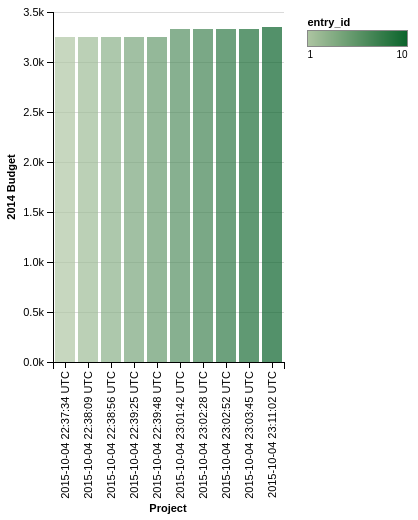

In [51]:
Chart(budget_top_10).mark_bar().encode(
    x=X('created_at:O',
        axis=Axis(title='Project')),
    y=Y('field1:Q',
        axis=Axis(title='2014 Budget')),
    color='entry_id')

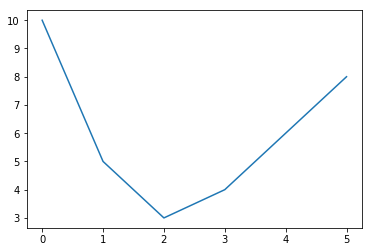

In [52]:
import matplotlib.pyplot as plt
plt.plot( [10,5,3,4,6,8] )
plt.show()

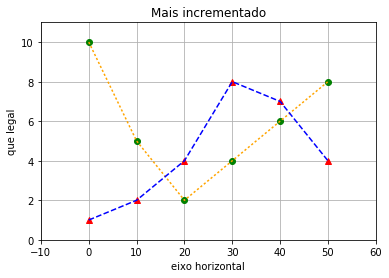

In [53]:
import numpy as np
import matplotlib.pyplot as plt


data1 = [10,5,2,4,6,8]
data2 = [ 1,2,4,8,7,4]
x = 10*np.array(range(len(data1)))

plt.plot( x, data1, 'go') # green bolinha
plt.plot( x, data1, 'k:', color='orange') # linha pontilha orange

plt.plot( x, data2, 'r^') # red triangulo
plt.plot( x, data2, 'k--', color='blue')  # linha tracejada azul

plt.axis([-10, 60, 0, 11])
plt.title("Mais incrementado")

plt.grid(True)
plt.xlabel("eixo horizontal")
plt.ylabel("que legal")
plt.show()

In [54]:
titulos_lancados = videogames['Plataforma'].value_counts()
titulos_lancados.plot()
videogames['Plataforma'].value_counts().plot()


NameError: name 'videogames' is not defined

## Referências